# Exploratory Data Analysis – Dataset 1

This notebook performs a detailed exploratory data analysis (EDA) on Dataset 1.  
The goals are to:
- Understand the distribution and relationships of the features
- Identify important variables related to heart disease
- Detect patterns, anomalies, and trends
- Generate insights to guide the statistical testing and modeling stages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.overview_functions import display_column_distribution, display_scatterplot_by_features

In [2]:
dataset1 = pd.read_csv('../data/cleaned_data/dataset1_cleaned.csv')
dataset1

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1311,44,1,94,122,67,204.0,1.63,0.006,0
1312,66,1,84,125,55,149.0,1.33,0.172,1
1313,45,1,85,168,104,96.0,1.24,4.250,1
1314,54,1,58,117,68,443.0,5.80,0.359,1


In [3]:
dataset1.describe()

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,56.208207,0.660334,75.982523,127.139058,72.217325,146.718617,15.303153,0.360970,0.613982
std,13.637762,0.473776,15.276877,26.144139,14.007815,74.979672,46.375924,1.155668,0.487020
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.657500,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.812500,0.085250,1.000000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


In [4]:
#Check the structure of the dataset1
dataset1.shape

(1316, 9)

In [5]:
dataset1.head(5)

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0


In [6]:
#Check data types
dataset1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1316 entries, 0 to 1315
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            1316 non-null   int64  
 1   gender         1316 non-null   int64  
 2   heart_rate     1316 non-null   int64  
 3   pressure_high  1316 non-null   int64  
 4   pressure_low   1316 non-null   int64  
 5   glucose        1316 non-null   float64
 6   kcm            1316 non-null   float64
 7   troponin       1316 non-null   float64
 8   heart_disease  1316 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 92.7 KB


In [7]:
# Check for empty values
dataset1.isna().sum()

age              0
gender           0
heart_rate       0
pressure_high    0
pressure_low     0
glucose          0
kcm              0
troponin         0
heart_disease    0
dtype: int64

In [8]:
dataset1['heart_disease'].value_counts(normalize=True) * 100

heart_disease
1    61.398176
0    38.601824
Name: proportion, dtype: float64

###### Distribution of heart disease into dataset 1
###### 0 - Negative
###### 1 - Positive


In [9]:
dataset1['gender'].value_counts(normalize=True) * 100

gender
1    66.033435
0    33.966565
Name: proportion, dtype: float64

###### Distribution of genders into dataset 1
###### 0 - female
###### 1 - male

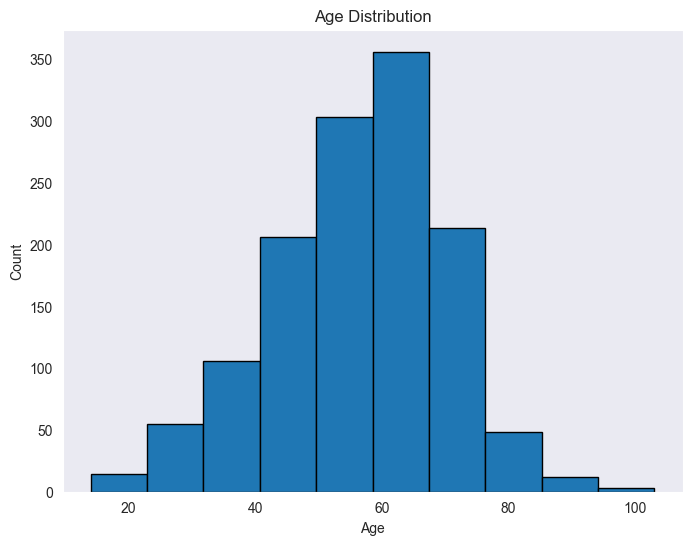

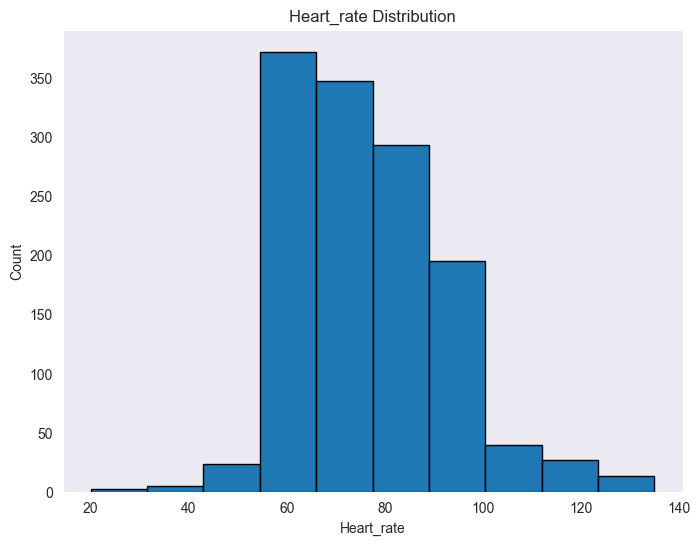

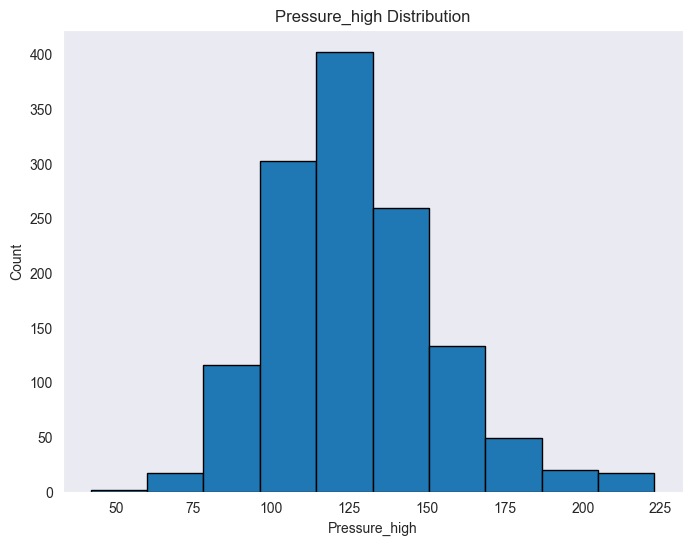

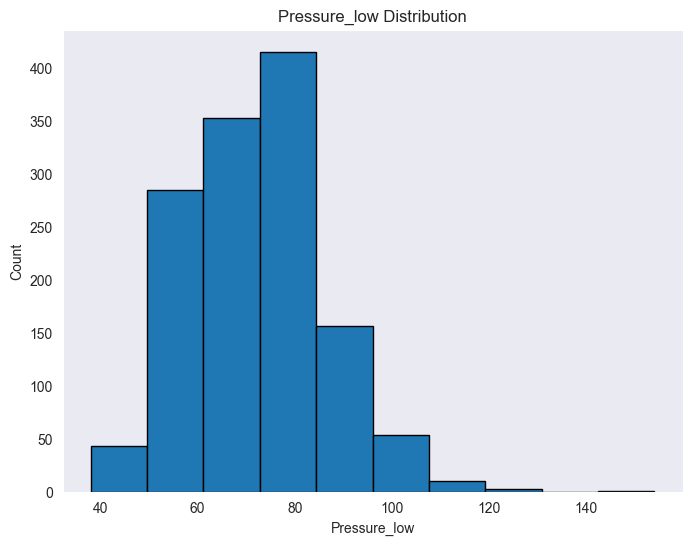

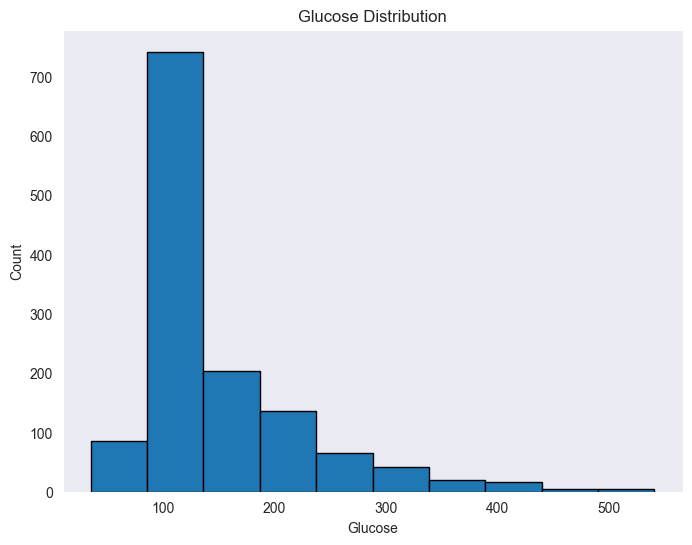

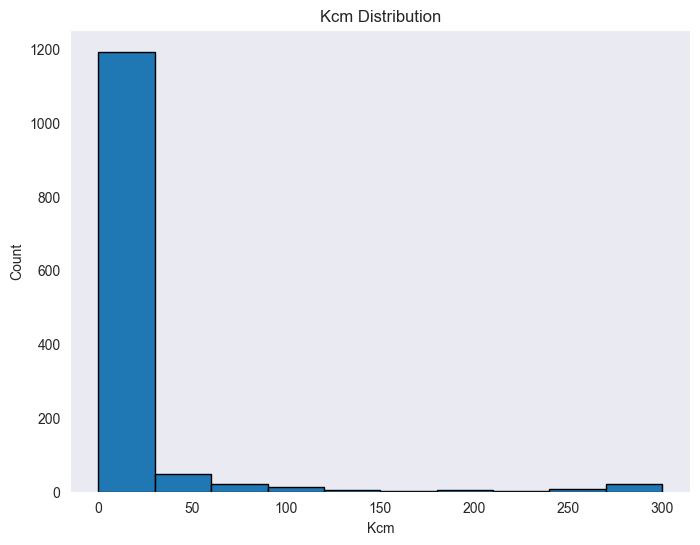

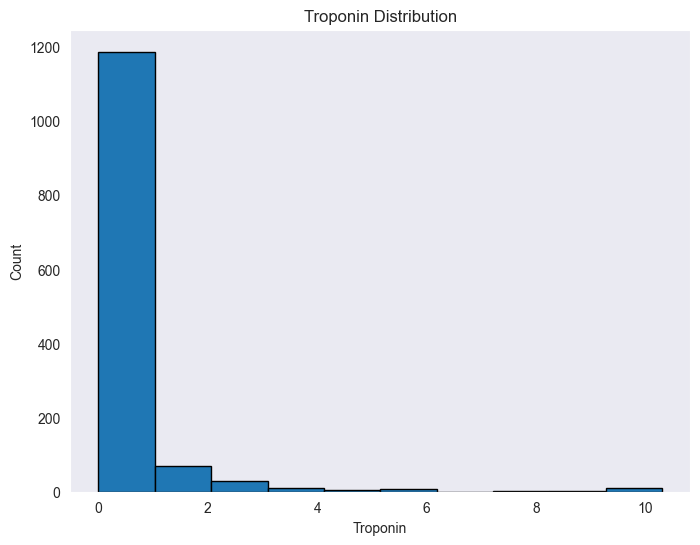

In [10]:
numeric_columns = dataset1.select_dtypes(include=['int64', 'float64']).columns.drop(['heart_disease', 'gender'])

for col in numeric_columns:
    display_column_distribution(dataset1, col)

**Insight:**  
The numerical features display a variety of distributions. Some variables are closer to a normal distribution, while others are noticeably skewed.  
- Features such as `age` are approximately symmetric.  
- Features such as `troponin` are skewed and may benefit from transformations in later preprocessing.  

Overall, this suggests that the dataset contains both normally distributed and skewed predictors, which is important for selecting appropriate statistical tests and modeling techniques.


### Numerical Features vs. Target (Heart Disease)

##### In the following boxplot visualizations, we will observe the separation of patients with and without heart disease based on their respective health indicators.


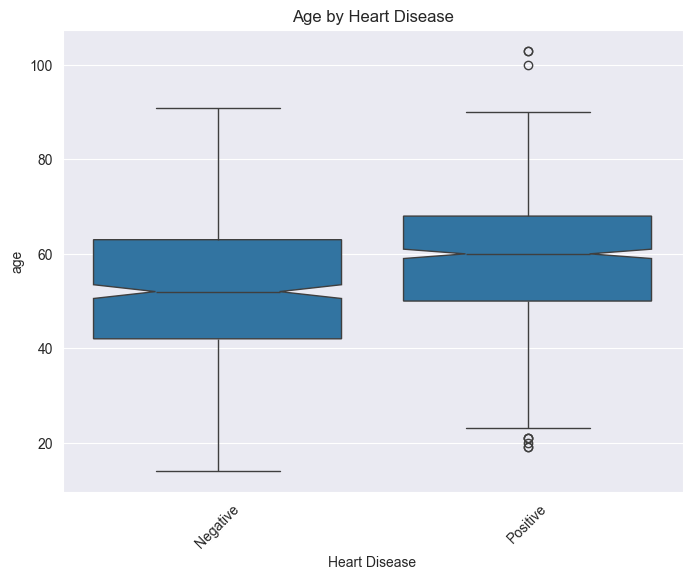

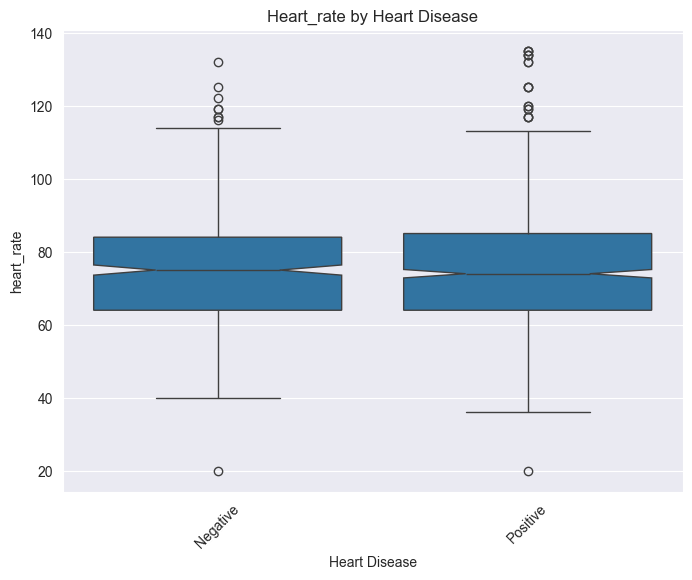

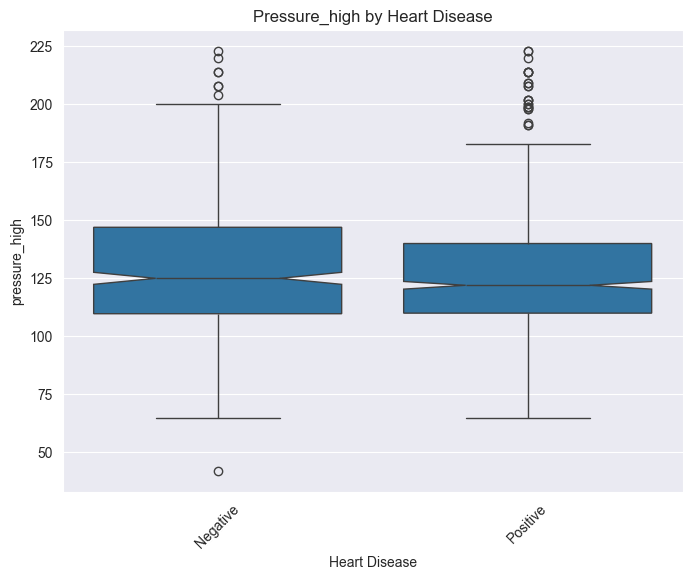

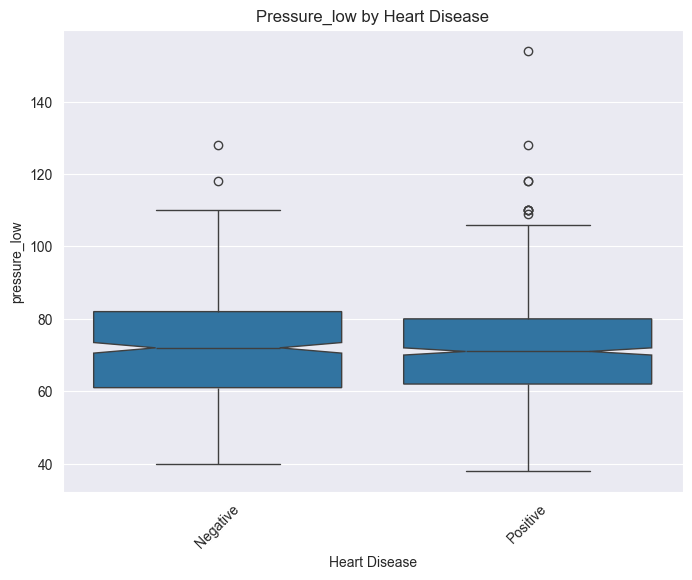

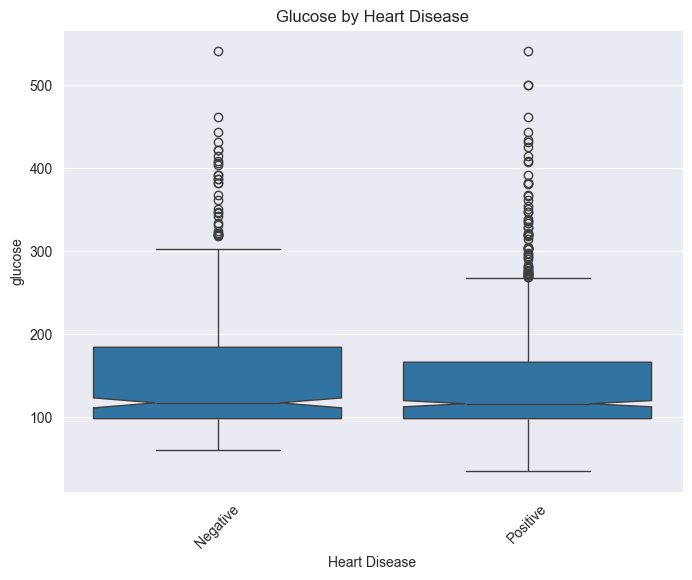

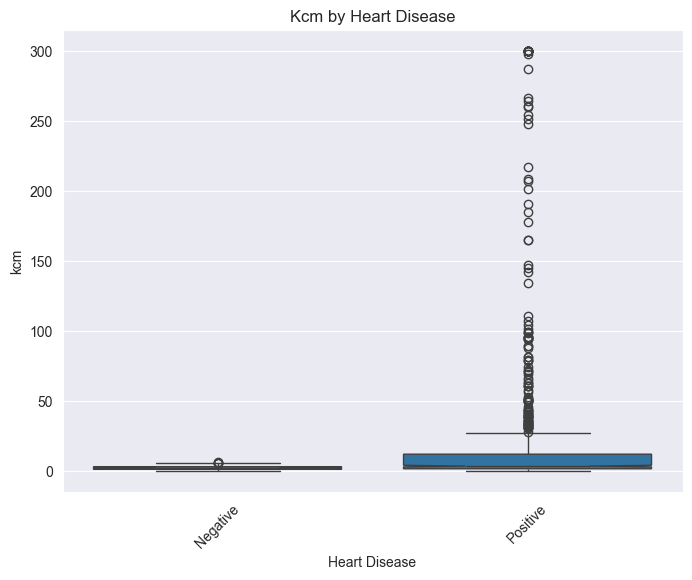

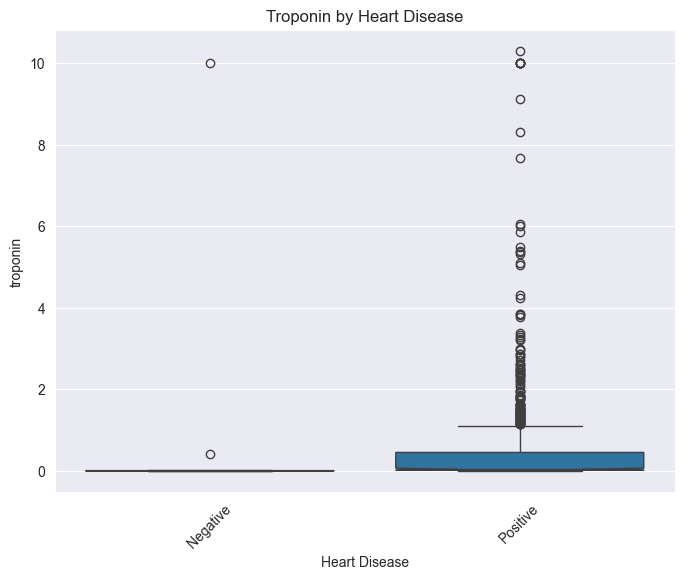

In [11]:
for col in numeric_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(
        x=dataset1['heart_disease'].map({0: 'Negative', 1: 'Positive'}),
        y=col,
        data=dataset1,
        notch=True,
        showfliers=True
    )
    
    
    plt.title(f'{col.capitalize()} by Heart Disease')
    plt.xlabel('Heart Disease')
    plt.xticks(rotation=45)
    plt.show()

### Correlation with Target and Key Scatterplots

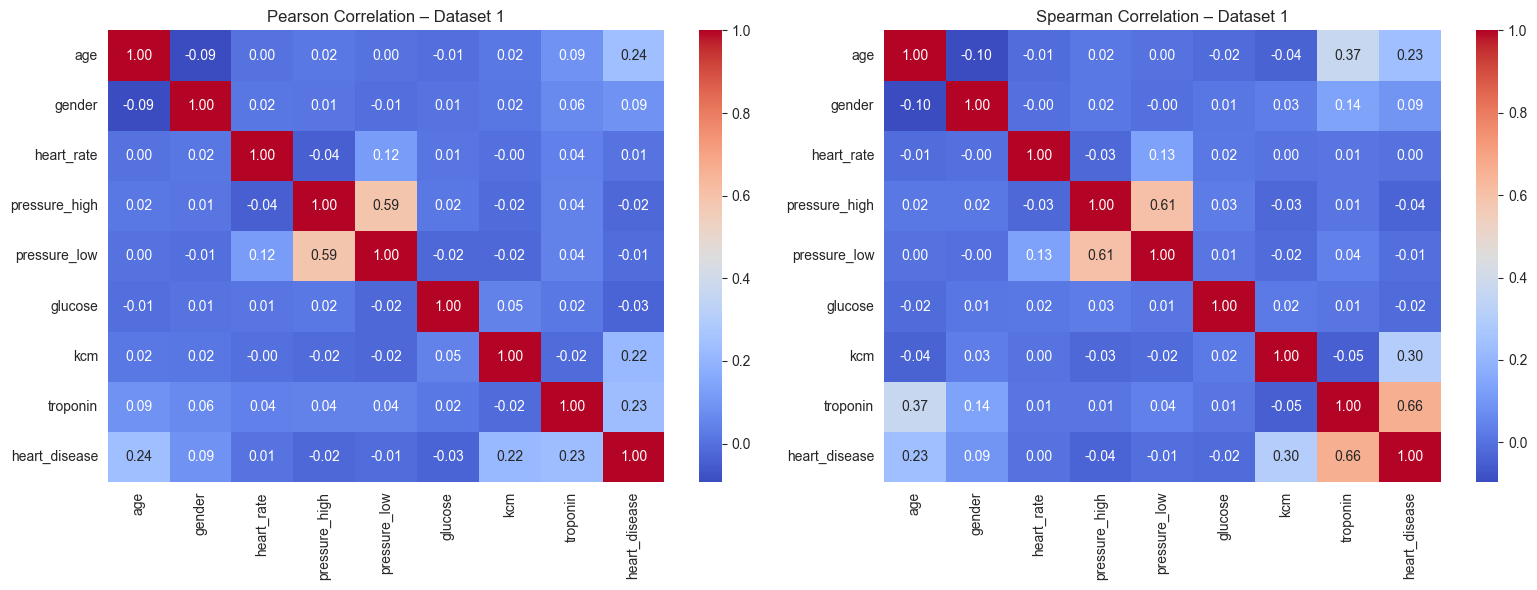

In [12]:
# Pearson and Spearman correlation matrices
corr_pearson = dataset1.corr(method='pearson')
corr_spearman = dataset1.corr(method='spearman')

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Pearson heatmap
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Pearson Correlation – Dataset 1")

# Spearman heatmap
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Spearman Correlation – Dataset 1")

plt.tight_layout()
plt.show()

**Insight:**  
The correlation matrix reveals several important relationships among the numerical features.  
- Most variables show weak to moderate correlations with each other, reducing concerns about severe multicollinearity.  
- The target variable `heart_disease` demonstrates stronger correlations with features such as `age`, `KCM`, and `troponin`, indicating their potential importance as predictors.  
- These findings justify a closer inspection of the most correlated variables through scatterplots and statistical testing in the following steps.


### Key Scatterplots of Strongly Correlated Features (Age, KCM, Troponin)


In [13]:
dataset1.describe()

,age,gender,heart_rate,pressure_high,pressure_low,glucose,kcm,troponin,heart_disease
count,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000,1316.000000
mean,56.208207,0.660334,75.982523,127.139058,72.217325,146.718617,15.303153,0.360970,0.613982
std,13.637762,0.473776,15.276877,26.144139,14.007815,74.979672,46.375924,1.155668,0.487020
min,14.000000,0.000000,20.000000,42.000000,38.000000,35.000000,0.321000,0.001000,0.000000
25%,47.000000,0.000000,64.000000,110.000000,62.000000,98.000000,1.657500,0.006000,0.000000
50%,58.000000,1.000000,74.000000,124.000000,72.000000,116.000000,2.850000,0.014000,1.000000
75%,65.000000,1.000000,85.000000,143.000000,81.000000,170.000000,5.812500,0.085250,1.000000
max,103.000000,1.000000,135.000000,223.000000,154.000000,541.000000,300.000000,10.300000,1.000000


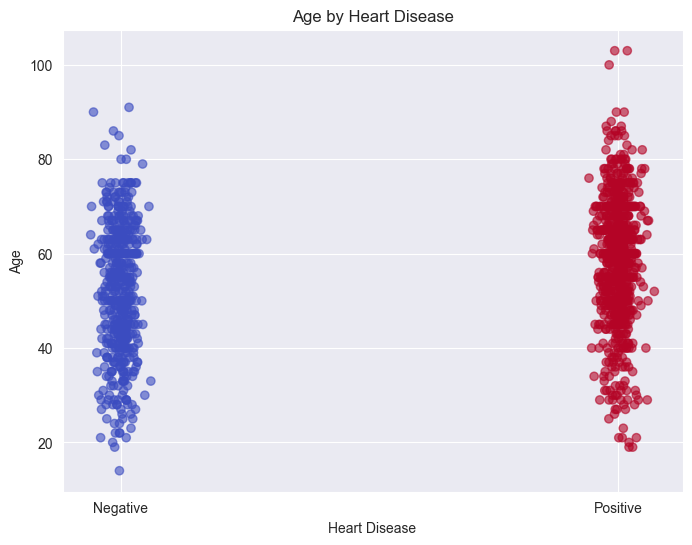

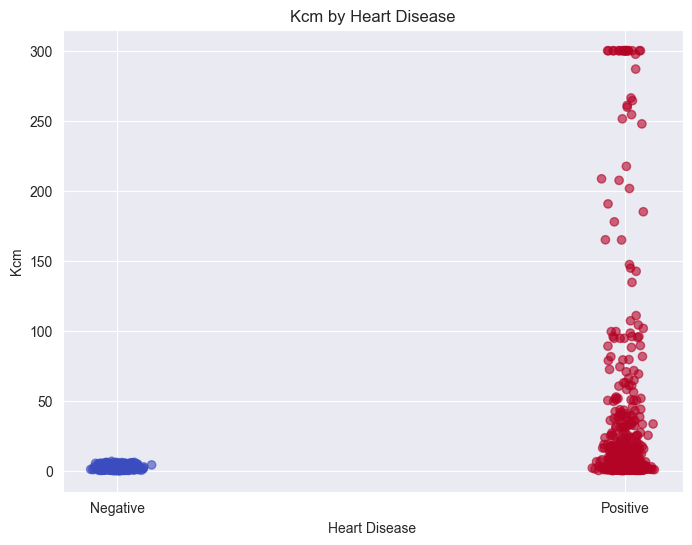

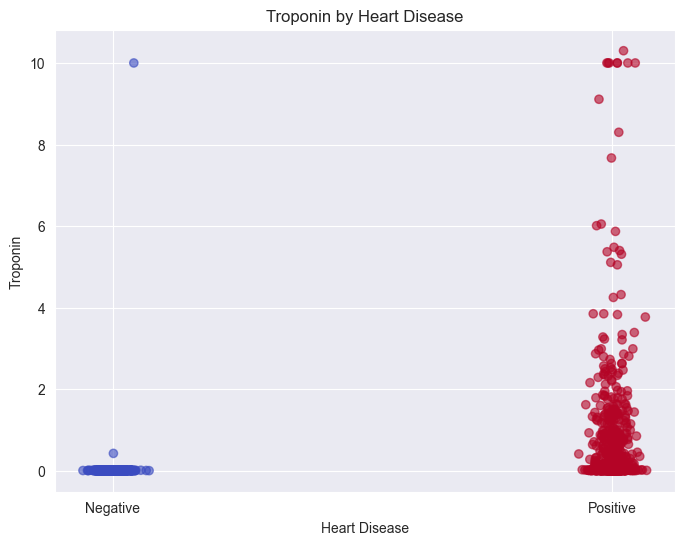

In [14]:
features = ['age', 'kcm', 'troponin']
display_scatterplot_by_features(dataset1, *features)

**Insight:**  
The scatterplots highlight clear differences between patients with and without heart disease across the selected features.  
- **Troponin**: Patients with heart disease consistently exhibit higher values, confirming its role as a strong biomarker.  
- **KCM**: Elevated KCM values are more frequent among positive cases, suggesting its diagnostic relevance.  
- **Age**: Older patients are more likely to be in the positive group, aligning with known risk factors.  

Overall, these plots visually reinforce the importance of age, KCM, and troponin as strong predictors of heart disease.


# Outlier Detection Using Interquartile Range (IQR)

### Outliers and Boxplots

The boxplots presented above already provide a visual representation of outliers using the Interquartile Range (IQR) method:  

- The **box** represents the interquartile range (from \(Q1\) to \(Q3\)), covering the middle 50% of the data.  
- The **whiskers** extend to the lower and upper bounds:  
  $$\[
  Q1 - 1.5 \times IQR \quad \text{and} \quad Q3 + 1.5 \times IQR
  \]$$
- **Points outside the whiskers** are identified as **outliers**.  

In other words, the boxplot is a direct graphical application of the IQR method, allowing us to easily detect extreme values in the dataset.

The factor **1.5** was introduced by John Tukey, the creator of the boxplot, as a practical threshold.  
It strikes a balance between flagging unusual values and avoiding excessive false positives.  
Points beyond **3 × IQR** are sometimes classified as **extreme outliers**.


### Methodology: Interquartile Range (IQR) for Outlier Detection

The Interquartile Range (IQR) is a robust statistical measure used to detect outliers in numerical data.  
It is based on the spread of the middle 50% of the data and is defined as:

$$\[
IQR = Q3 - Q1
\]$$

where:  
- \( Q1 \) = 25th percentile (first quartile)  
- \( Q3 \) = 75th percentile (third quartile)  

An observation \( x \) is considered an outlier if it falls outside the following bounds:

$$\[
\text{Lower Bound} = Q1 - 1.5 \times IQR
\]$$
$$\[
\text{Upper Bound} = Q3 + 1.5 \times IQR
\]$$

- Values below the **Lower Bound** are classified as **low outliers**.  
- Values above the **Upper Bound** are classified as **high outliers**.  

This method is widely used because it does not assume normality of the data and is less sensitive to skewed distributions compared to z-score based methods.

In [15]:
features_to_check = ["age", "kcm", "troponin"]

for f in features_to_check:
    Q1 = dataset1[f].quantile(0.25)
    Q3 = dataset1[f].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = dataset1[(dataset1[f] < lower_bound) | (dataset1[f] > upper_bound)]
    
    print(f"Feature: {f}")
    print(f" - Q1: {Q1:.2f}, Q3: {Q3:.2f}, IQR: {IQR:.2f}")
    print(f" - Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}")
    print(f" - Outliers detected: {outliers.shape[0]}")
    print("-" * 40)

Feature: age
 - Q1: 47.00, Q3: 65.00, IQR: 18.00
 - Lower bound: 20.00, Upper bound: 92.00
 - Outliers detected: 7
----------------------------------------
Feature: kcm
 - Q1: 1.66, Q3: 5.81, IQR: 4.16
 - Lower bound: -4.58, Upper bound: 12.04
 - Outliers detected: 205
----------------------------------------
Feature: troponin
 - Q1: 0.01, Q3: 0.09, IQR: 0.08
 - Lower bound: -0.11, Upper bound: 0.20
 - Outliers detected: 256
----------------------------------------


**Insight:**  
The IQR method confirms the presence of outliers already visible in the boxplots.  
By calculating Q1, Q3, and the IQR, we can identify values that fall outside the lower and upper bounds.  
This provides a quantitative measure of outliers for key features such as age, KCM, and troponin.


### Why Use Both Boxplot and Stripplot?

Boxplots are useful because they summarize the distribution of a variable and highlight potential outliers based on the IQR method.  
However, in the case of `age`, some outliers were not clearly visible in the boxplot due to overlapping values or alignment with the whiskers.  

By adding a stripplot on top of the boxplot, we can see the actual data points, including multiple occurrences of the same extreme values.  
This combination provides both the statistical detection of outliers (boxplot) and the precise visualization of where those data points lie (stripplot).


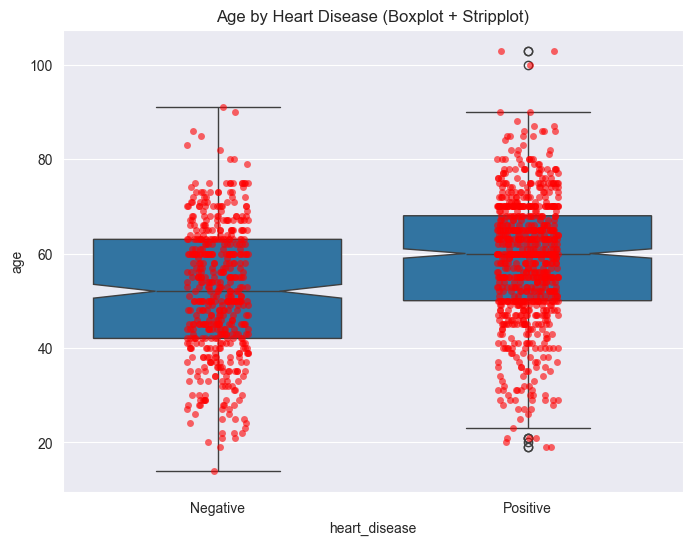

In [16]:
plt.figure(figsize=(8,6))
sns.boxplot(
    x=dataset1['heart_disease'].map({0: 'Negative', 1: 'Positive'}),
    y=dataset1['age'],
    data=dataset1,
    notch=True,
    showfliers=True
)
sns.stripplot(
    x=dataset1['heart_disease'].map({0: 'Negative', 1: 'Positive'}),
    y=dataset1['age'],
    data=dataset1,
    color="red", alpha=0.6, jitter=True
)
plt.title("Age by Heart Disease (Boxplot + Stripplot)")
plt.show()

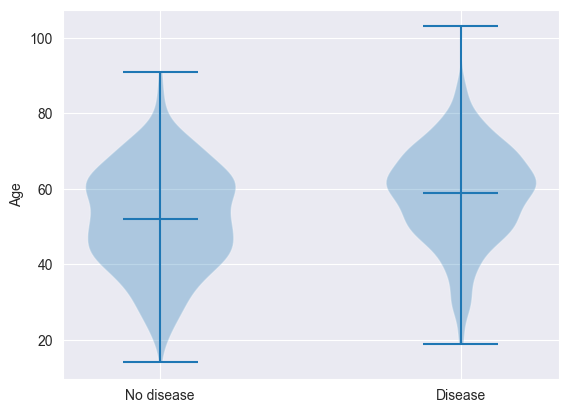

In [17]:
plt.violinplot([dataset1[dataset1["heart_disease"] == 0]["age"],
                dataset1[dataset1["heart_disease"] == 1]["age"]],
               showmeans=True)
plt.xticks([1, 2], ["No disease", "Disease"])
plt.ylabel('Age')
plt.show()

**Insight:**  
Patients with heart disease tend to be older, with a median age around **60 years**,  
whereas patients without heart disease have a lower median age, closer to **50 years**.  
This suggests that age is an important risk factor associated with heart disease.


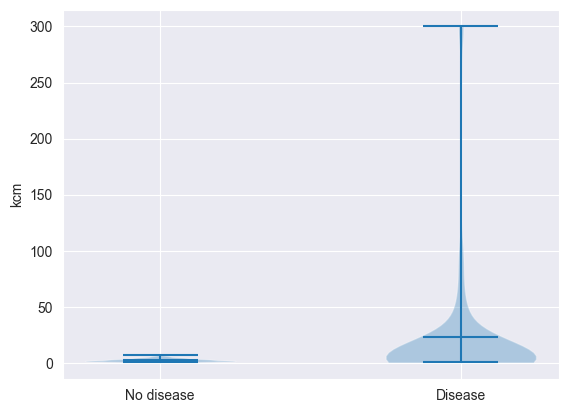

In [18]:
plt.violinplot([dataset1[dataset1["heart_disease"] == 0]["kcm"],
                dataset1[dataset1["heart_disease"] == 1]["kcm"]],
               showmeans=True)
plt.xticks([1, 2], ["No disease", "Disease"])
plt.ylabel('kcm')
plt.show()

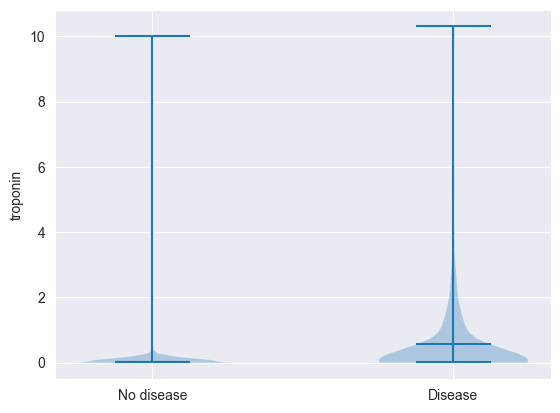

In [19]:
plt.violinplot([dataset1[dataset1["heart_disease"] == 0]["troponin"],
                dataset1[dataset1["heart_disease"] == 1]["troponin"]],
               showmeans=True)
plt.xticks([1, 2], ["No disease", "Disease"])
plt.ylabel('troponin')
plt.show()

**Insight:**  
For the indicators **KCM** and **Troponin**, higher levels are strongly associated with the presence of heart disease.  
This suggests that elevated values of these biomarkers can serve as important signals in identifying patients at risk.
